In [7]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

ERROR! Session/line number was not unique in database. History logging moved to new session 258


In [8]:
data = fits.open('data_wht_isis/r2701004_red_arc.fit')[1]

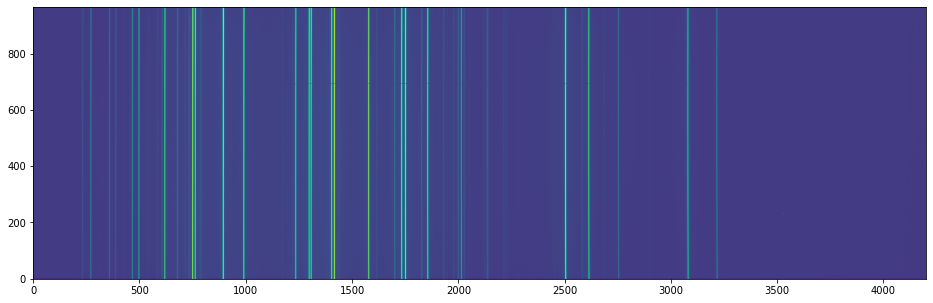

In [9]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')

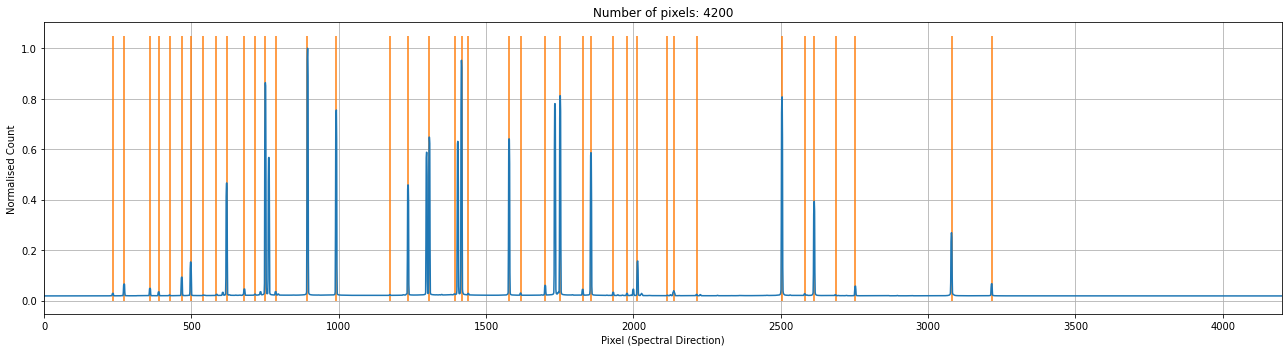

In [10]:
spectrum = np.median(data.data.T, axis=0)

peaks, _ = find_peaks(spectrum, prominence=80, distance=20, threshold=None)

peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

plt.figure(figsize=(18,5))
plt.plot(spectrum / spectrum.max())
plt.vlines(peaks, 0, 1.05, colors='C1')
plt.title('Number of pixels: ' + str(spectrum.shape[0]))
plt.xlabel("Pixel (Spectral Direction)")
plt.ylabel("Normalised Count")
plt.xlim(0, spectrum.shape[0])
plt.grid()
plt.tight_layout()

In [11]:
c = Calibrator(peaks_refined,
               min_wavelength=7000.,
               max_wavelength=10500.,
               num_pix=len(spectrum))
c.set_fit_constraints(num_slopes=10000,
                      range_tolerance=500.,
                      polydeg=7,
                      xbins=500,
                      ybins=500)
c.add_atlas(["Ne", "Ar", "Cu"])

INFO:rascal.calibrator:Peak at: 7032.0186637709685 A
INFO:rascal.calibrator:- matched to 7030.16748046875 A
INFO:rascal.calibrator:Peak at: 7066.873967473939 A
INFO:rascal.calibrator:Peak at: 7146.7471704834425 A
INFO:rascal.calibrator:- matched to 7146.95654296875 A
INFO:rascal.calibrator:Peak at: 7173.726607518155 A
INFO:rascal.calibrator:- matched to 7173.85205078125 A
INFO:rascal.calibrator:Peak at: 7206.791575012118 A
INFO:rascal.calibrator:- matched to 7206.892578125 A
INFO:rascal.calibrator:Peak at: 7245.143452317349 A
INFO:rascal.calibrator:- matched to 7245.0791015625 A
INFO:rascal.calibrator:Peak at: 7272.842270173231 A
INFO:rascal.calibrator:Peak at: 7311.899595602306 A
INFO:rascal.calibrator:Peak at: 7353.716679708844 A
INFO:rascal.calibrator:- matched to 7353.20361328125 A
INFO:rascal.calibrator:Peak at: 7384.009802524599 A
INFO:rascal.calibrator:Peak at: 7439.102497134846 A
INFO:rascal.calibrator:- matched to 7438.80712890625 A
INFO:rascal.calibrator:Peak at: 7471.7934325

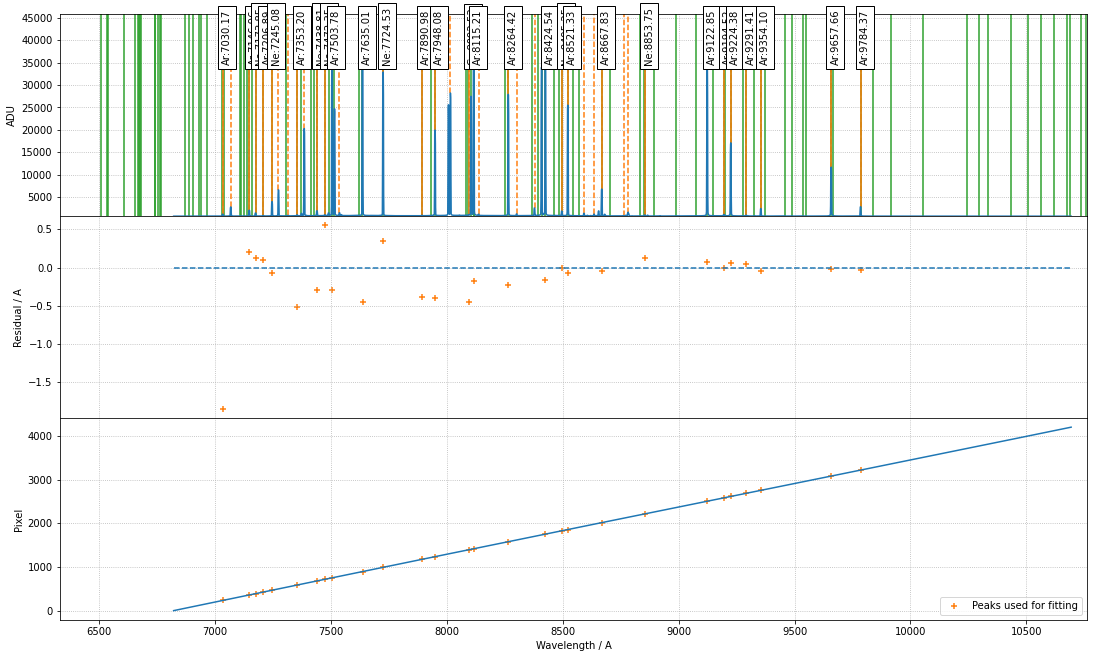

Stdev error: 0.47265438258241593 A
Peaks utilisation rate: 100.0%


In [12]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=1000,
                                                candidate_weighted=True,
                                                hough_weight=1.0,
                                                filter_close=True)

c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False, tolerance=5.0, renderer='notebook')


rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

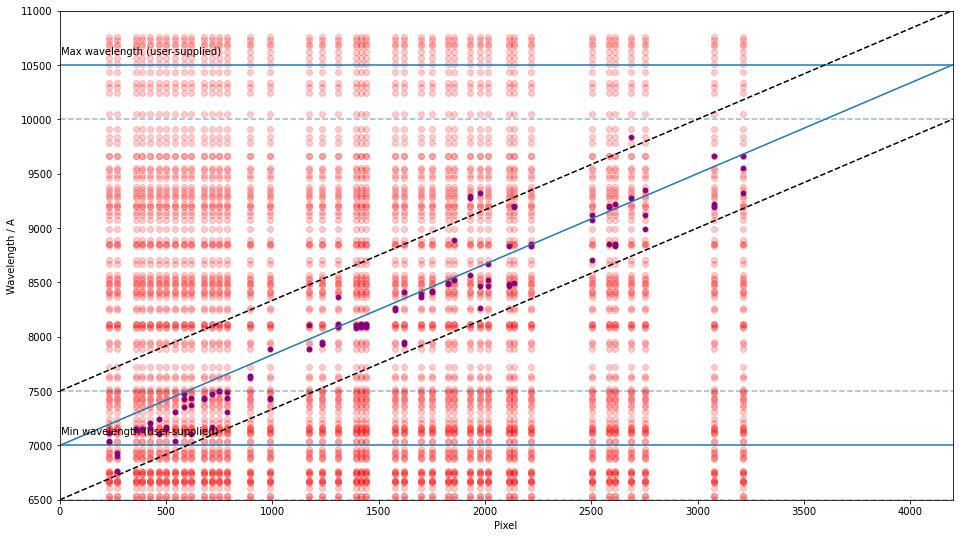

In [13]:
c.plot_search_space()